In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
michael = "C:/Users/micha/Documents/1_Wirtschaftsinformatik/4. Semester/Data Science & Machine Learning/Gruppenprojekt/"
martin = "C:/Users/mbirk/OneDrive/Uni/Semester_4/DSML/YMMMMY/YMMMMY_repository/data/"

user = martin

ride_source= user + "2019_05.csv"
weather_source= user + "weather.csv"
census_tract_source= user + "census_tract_characteristics.csv"

In [3]:
ride = pd.read_csv(ride_source)
weather = pd.read_csv(weather_source)
census_tract = pd.read_csv(census_tract_source)

In [4]:
ride.head()

,Trip ID,Trip Miles,Trip Start Timestamp,Trip End Timestamp,Pickup Census Tract,Pickup Centroid Location,Dropoff Census Tract,Dropoff Centroid Location,Shared Trip Authorized,Trips Pooled,Trip Total,Fare,Additional Charges,Tip
0,001ab3a53a4f74430d2a9aae216fed703244cfc9,1.5,2019-05-01 00:00:00,2019-05-01 00:00:00,1.703183e+10,POINT (-87.6542980837 41.9462945357),1.703106e+10,POINT (-87.671518011 41.9579038971),False,1,5.05,2.5,2.55,0
1,01080eb6fc1bd9ec70e3fd8a2a56345754b92332,5.7,2019-05-01 00:00:00,2019-05-01 00:15:00,1.703108e+10,POINT (-87.6288741572 41.8920726347),1.703183e+10,POINT (-87.6542980837 41.9462945357),True,2,8.22,7.5,0.72,0
2,015aeacaa25560b04a0dfc6a48f95a820f9a22f6,0.7,2019-05-01 00:00:00,2019-05-01 00:15:00,1.703133e+10,POINT (-87.6173580061 41.859349715),1.703184e+10,POINT (-87.6314065252 41.8710158803),False,1,5.05,2.5,2.55,0
3,01aded4891f4d76040f68a15730afcb5003b70ea,2.7,2019-05-01 00:00:00,2019-05-01 00:15:00,1.703128e+10,POINT (-87.642648998 41.8792550844),1.703108e+10,POINT (-87.6318639497 41.8920421365),False,1,10.05,7.5,2.55,0
4,023ea4b576bf41415848e32b5fc4fae7d49e4cca,0.7,2019-05-01 00:00:00,2019-05-01 00:00:00,1.703128e+10,POINT (-87.6428084655 41.8853000224),1.703184e+10,POINT (-87.6327464887 41.8809944707),False,1,7.55,5.0,2.55,0


In [5]:
weather.head()

,date,wind,precipitation,avg_temp
0,2018-10-01,3.2,39.6,16.0
1,2018-10-02,2.3,0.3,16.7
2,2018-10-03,6.2,0.0,20.9
3,2018-10-04,7.2,1.0,18.8
4,2018-10-05,3.2,31.5,14.1


In [6]:
print(ride.isnull().sum())

Trip ID                      0
Trip Miles                   0
Trip Start Timestamp         0
Trip End Timestamp           0
Pickup Census Tract          0
Pickup Centroid Location     0
Dropoff Census Tract         0
Dropoff Centroid Location    0
Shared Trip Authorized       0
Trips Pooled                 0
Trip Total                   0
Fare                         0
Additional Charges           0
Tip                          0
dtype: int64


In [7]:
ride.dtypes

Trip ID                       object
Trip Miles                    object
Trip Start Timestamp          object
Trip End Timestamp            object
Pickup Census Tract          float64
Pickup Centroid Location      object
Dropoff Census Tract         float64
Dropoff Centroid Location     object
Shared Trip Authorized          bool
Trips Pooled                   int64
Trip Total                   float64
Fare                         float64
Additional Charges           float64
Tip                            int64
dtype: object

In [8]:
updatedRides = ride.copy(deep = True)
updatedWeather = weather.copy(deep = True)

In [9]:
updatedRides["Trip Start Timestamp"] = pd.to_datetime(ride["Trip Start Timestamp"])
updatedRides["Trip End Timestamp"] = pd.to_datetime(ride["Trip End Timestamp"])

In [10]:
updatedWeather["date"] = pd.to_datetime(weather["date"])

In [11]:
updatedRides.head()

,Trip ID,Trip Miles,Trip Start Timestamp,Trip End Timestamp,Pickup Census Tract,Pickup Centroid Location,Dropoff Census Tract,Dropoff Centroid Location,Shared Trip Authorized,Trips Pooled,Trip Total,Fare,Additional Charges,Tip
0,001ab3a53a4f74430d2a9aae216fed703244cfc9,1.5,2019-05-01,2019-05-01 00:00:00,1.703183e+10,POINT (-87.6542980837 41.9462945357),1.703106e+10,POINT (-87.671518011 41.9579038971),False,1,5.05,2.5,2.55,0
1,01080eb6fc1bd9ec70e3fd8a2a56345754b92332,5.7,2019-05-01,2019-05-01 00:15:00,1.703108e+10,POINT (-87.6288741572 41.8920726347),1.703183e+10,POINT (-87.6542980837 41.9462945357),True,2,8.22,7.5,0.72,0
2,015aeacaa25560b04a0dfc6a48f95a820f9a22f6,0.7,2019-05-01,2019-05-01 00:15:00,1.703133e+10,POINT (-87.6173580061 41.859349715),1.703184e+10,POINT (-87.6314065252 41.8710158803),False,1,5.05,2.5,2.55,0
3,01aded4891f4d76040f68a15730afcb5003b70ea,2.7,2019-05-01,2019-05-01 00:15:00,1.703128e+10,POINT (-87.642648998 41.8792550844),1.703108e+10,POINT (-87.6318639497 41.8920421365),False,1,10.05,7.5,2.55,0
4,023ea4b576bf41415848e32b5fc4fae7d49e4cca,0.7,2019-05-01,2019-05-01 00:00:00,1.703128e+10,POINT (-87.6428084655 41.8853000224),1.703184e+10,POINT (-87.6327464887 41.8809944707),False,1,7.55,5.0,2.55,0


In [12]:
updatedWeather.dtypes

date             datetime64[ns]
wind                    float64
precipitation           float64
avg_temp                float64
dtype: object

In [13]:
updatedRides.dtypes

Trip ID                              object
Trip Miles                           object
Trip Start Timestamp         datetime64[ns]
Trip End Timestamp           datetime64[ns]
Pickup Census Tract                 float64
Pickup Centroid Location             object
Dropoff Census Tract                float64
Dropoff Centroid Location            object
Shared Trip Authorized                 bool
Trips Pooled                          int64
Trip Total                          float64
Fare                                float64
Additional Charges                  float64
Tip                                   int64
dtype: object

In [14]:
only_date = updatedRides["Trip Start Timestamp"].dt.date
updatedRides.insert(2, "Date", only_date)

In [15]:
updatedRides["Date"] = pd.to_datetime(updatedRides["Date"])
updatedRides.head()

,Trip ID,Trip Miles,Date,Trip Start Timestamp,Trip End Timestamp,Pickup Census Tract,Pickup Centroid Location,Dropoff Census Tract,Dropoff Centroid Location,Shared Trip Authorized,Trips Pooled,Trip Total,Fare,Additional Charges,Tip
0,001ab3a53a4f74430d2a9aae216fed703244cfc9,1.5,2019-05-01,2019-05-01,2019-05-01 00:00:00,1.703183e+10,POINT (-87.6542980837 41.9462945357),1.703106e+10,POINT (-87.671518011 41.9579038971),False,1,5.05,2.5,2.55,0
1,01080eb6fc1bd9ec70e3fd8a2a56345754b92332,5.7,2019-05-01,2019-05-01,2019-05-01 00:15:00,1.703108e+10,POINT (-87.6288741572 41.8920726347),1.703183e+10,POINT (-87.6542980837 41.9462945357),True,2,8.22,7.5,0.72,0
2,015aeacaa25560b04a0dfc6a48f95a820f9a22f6,0.7,2019-05-01,2019-05-01,2019-05-01 00:15:00,1.703133e+10,POINT (-87.6173580061 41.859349715),1.703184e+10,POINT (-87.6314065252 41.8710158803),False,1,5.05,2.5,2.55,0
3,01aded4891f4d76040f68a15730afcb5003b70ea,2.7,2019-05-01,2019-05-01,2019-05-01 00:15:00,1.703128e+10,POINT (-87.642648998 41.8792550844),1.703108e+10,POINT (-87.6318639497 41.8920421365),False,1,10.05,7.5,2.55,0
4,023ea4b576bf41415848e32b5fc4fae7d49e4cca,0.7,2019-05-01,2019-05-01,2019-05-01 00:00:00,1.703128e+10,POINT (-87.6428084655 41.8853000224),1.703184e+10,POINT (-87.6327464887 41.8809944707),False,1,7.55,5.0,2.55,0


In [16]:
updatedRides.dtypes

Trip ID                              object
Trip Miles                           object
Date                         datetime64[ns]
Trip Start Timestamp         datetime64[ns]
Trip End Timestamp           datetime64[ns]
Pickup Census Tract                 float64
Pickup Centroid Location             object
Dropoff Census Tract                float64
Dropoff Centroid Location            object
Shared Trip Authorized                 bool
Trips Pooled                          int64
Trip Total                          float64
Fare                                float64
Additional Charges                  float64
Tip                                   int64
dtype: object

In [17]:
combined_data = updatedRides.merge(updatedWeather,how="left", left_on="Date", right_on="date")

In [18]:
combined_data

,Trip ID,Trip Miles,Date,Trip Start Timestamp,Trip End Timestamp,Pickup Census Tract,Pickup Centroid Location,Dropoff Census Tract,Dropoff Centroid Location,Shared Trip Authorized,Trips Pooled,Trip Total,Fare,Additional Charges,Tip,date,wind,precipitation,avg_temp
0,001ab3a53a4f74430d2a9aae216fed703244cfc9,1.5,2019-05-01,2019-05-01 00:00:00,2019-05-01 00:00:00,1.703183e+10,POINT (-87.6542980837 41.9462945357),1.703106e+10,POINT (-87.671518011 41.9579038971),False,1,5.05,2.5,2.55,0,2019-05-01,3.7,20.3,10.0
1,01080eb6fc1bd9ec70e3fd8a2a56345754b92332,5.7,2019-05-01,2019-05-01 00:00:00,2019-05-01 00:15:00,1.703108e+10,POINT (-87.6288741572 41.8920726347),1.703183e+10,POINT (-87.6542980837 41.9462945357),True,2,8.22,7.5,0.72,0,2019-05-01,3.7,20.3,10.0
2,015aeacaa25560b04a0dfc6a48f95a820f9a22f6,0.7,2019-05-01,2019-05-01 00:00:00,2019-05-01 00:15:00,1.703133e+10,POINT (-87.6173580061 41.859349715),1.703184e+10,POINT (-87.6314065252 41.8710158803),False,1,5.05,2.5,2.55,0,2019-05-01,3.7,20.3,10.0
3,01aded4891f4d76040f68a15730afcb5003b70ea,2.7,2019-05-01,2019-05-01 00:00:00,2019-05-01 00:15:00,1.703128e+10,POINT (-87.642648998 41.8792550844),1.703108e+10,POINT (-87.6318639497 41.8920421365),False,1,10.05,7.5,2.55,0,2019-05-01,3.7,20.3,10.0
4,023ea4b576bf41415848e32b5fc4fae7d49e4cca,0.7,2019-05-01,2019-05-01 00:00:00,2019-05-01 00:00:00,1.703128e+10,POINT (-87.6428084655 41.8853000224),1.703184e+10,POINT (-87.6327464887 41.8809944707),False,1,7.55,5.0,2.55,0,2019-05-01,3.7,20.3,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,98708595ff6f19c2b70451790629f365d41cd18b,1.9,2019-05-05,2019-05-05 12:00:00,2019-05-05 12:00:00,1.703184e+10,POINT (-87.6536139825 41.8983058696),1.703108e+10,POINT (-87.6207628651 41.8983317935),False,1,15.55,10.0,2.55,3,2019-05-05,2.9,0.0,14.6
1048571,989fa23b960da5638a86b809f71fea236b915013,0.7,2019-05-05,2019-05-05 12:00:00,2019-05-05 12:00:00,1.703133e+10,POINT (-87.6173580061 41.859349715),1.703132e+10,POINT (-87.6221729369 41.8706073724),False,1,7.55,5.0,2.55,0,2019-05-05,2.9,0.0,14.6
1048572,98ace34768485372863f55540d186b58556f9b12,1.2,2019-05-05,2019-05-05 12:00:00,2019-05-05 12:00:00,1.703108e+10,POINT (-87.6129454143 41.8919715078),1.703108e+10,POINT (-87.6291051864 41.9002212967),False,1,13.55,10.0,2.55,1,2019-05-05,2.9,0.0,14.6
1048573,98d4c5e823caa1e6540a808d3ccdade13600a823,3.3,2019-05-05,2019-05-05 12:00:00,2019-05-05 12:30:00,1.703184e+10,POINT (-87.672920435 41.8631181033),1.703108e+10,POINT (-87.6318639497 41.8920421365),True,2,5.00,5.0,0.00,0,2019-05-05,2.9,0.0,14.6


In [19]:
# this is my addad code (martin) the other cells remain unchanged except for the first cell (additional imports) and the second cell (source paths)

In [20]:
census_tract_prepared = census_tract.rename(columns={'ID': 'ID_Census_Tract'}, inplace=False)

In [21]:
combined_data['Trip Miles'] = combined_data['Trip Miles'].str.replace(' mi', '', regex=False)

In [22]:

combined_data['Trip Miles'] = pd.to_numeric(combined_data['Trip Miles'])

In [23]:
# Merge für Pickup Census Tract

combined_data_pickup = pd.merge(
    combined_data,
    census_tract_prepared,
    left_on='Pickup Census Tract',
    right_on='ID_Census_Tract',
    how='left',
    suffixes=('', '_pickup')
)

# Merge für Dropoff Census Tract

combined_data_dropoff = pd.merge(
    combined_data,
    census_tract_prepared,
    left_on='Dropoff Census Tract',
    right_on='ID_Census_Tract',
    how='left',
    suffixes=('', '_dropoff')
)

In [24]:
combined_data_pickup['tip_binary'] = (combined_data_pickup['Tip'] > 0).astype(int)

In [25]:
combined_data_pickup.head()

,Trip ID,Trip Miles,Date,Trip Start Timestamp,Trip End Timestamp,Pickup Census Tract,Pickup Centroid Location,Dropoff Census Tract,Dropoff Centroid Location,Shared Trip Authorized,...,population,households,share_female,median_age,share_over_65,avg_household_size,share_bachelor_degree_or_higher,unemployment_rate,share_income_below_poverty_level,tip_binary
0,001ab3a53a4f74430d2a9aae216fed703244cfc9,1.5,2019-05-01,2019-05-01,2019-05-01 00:00:00,1.703183e+10,POINT (-87.6542980837 41.9462945357),1.703106e+10,POINT (-87.671518011 41.9579038971),False,...,1781.0,822.0,0.391,28.8,0.022,2.15,0.774,0.040,0.121,0
1,01080eb6fc1bd9ec70e3fd8a2a56345754b92332,5.7,2019-05-01,2019-05-01,2019-05-01 00:15:00,1.703108e+10,POINT (-87.6288741572 41.8920726347),1.703183e+10,POINT (-87.6542980837 41.9462945357),True,...,4000.0,2663.0,0.492,33.5,0.084,1.50,0.853,0.035,0.080,0
2,015aeacaa25560b04a0dfc6a48f95a820f9a22f6,0.7,2019-05-01,2019-05-01,2019-05-01 00:15:00,1.703133e+10,POINT (-87.6173580061 41.859349715),1.703184e+10,POINT (-87.6314065252 41.8710158803),False,...,19889.0,11517.0,0.535,35.3,0.080,1.71,0.752,0.020,0.091,0
3,01aded4891f4d76040f68a15730afcb5003b70ea,2.7,2019-05-01,2019-05-01,2019-05-01 00:15:00,1.703128e+10,POINT (-87.642648998 41.8792550844),1.703108e+10,POINT (-87.6318639497 41.8920421365),False,...,6018.0,3527.0,0.496,30.1,0.026,1.68,0.903,0.044,0.179,0
4,023ea4b576bf41415848e32b5fc4fae7d49e4cca,0.7,2019-05-01,2019-05-01,2019-05-01 00:00:00,1.703128e+10,POINT (-87.6428084655 41.8853000224),1.703184e+10,POINT (-87.6327464887 41.8809944707),False,...,6447.0,4096.0,0.502,32.9,0.073,1.57,0.914,0.019,0.076,0


In [26]:
combined_data_pickup.info

<bound method DataFrame.info of                                           Trip ID  Trip Miles       Date  \
0        001ab3a53a4f74430d2a9aae216fed703244cfc9         1.5 2019-05-01   
1        01080eb6fc1bd9ec70e3fd8a2a56345754b92332         5.7 2019-05-01   
2        015aeacaa25560b04a0dfc6a48f95a820f9a22f6         0.7 2019-05-01   
3        01aded4891f4d76040f68a15730afcb5003b70ea         2.7 2019-05-01   
4        023ea4b576bf41415848e32b5fc4fae7d49e4cca         0.7 2019-05-01   
...                                           ...         ...        ...   
1048570  98708595ff6f19c2b70451790629f365d41cd18b         1.9 2019-05-05   
1048571  989fa23b960da5638a86b809f71fea236b915013         0.7 2019-05-05   
1048572  98ace34768485372863f55540d186b58556f9b12         1.2 2019-05-05   
1048573  98d4c5e823caa1e6540a808d3ccdade13600a823         3.3 2019-05-05   
1048574  98ee37e9293ad26552e2cf40215ec3b0e0d39c42         3.8 2019-05-05   

        Trip Start Timestamp  Trip End Timestamp  Picku

c:\Users\mbirk\anaconda3\envs\DSML_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mbirk\anaconda3\envs\DSML_env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\mbirk\anaconda3\envs\DSML_env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


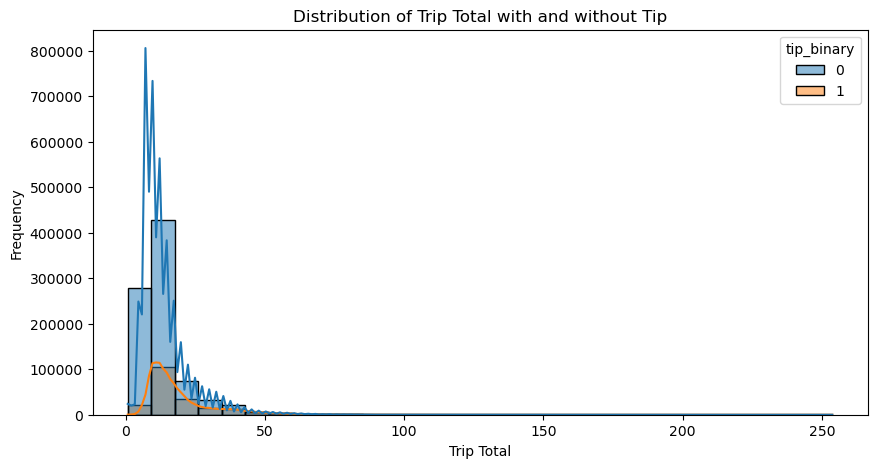

In [27]:
# Visualisierung:

# Histogram of trip total with and without tip
plt.figure(figsize=(10, 5))
sns.histplot(data=combined_data_pickup, x='Trip Total', hue='tip_binary', kde=True, bins=30)
plt.title('Distribution of Trip Total with and without Tip')
plt.xlabel('Trip Total')
plt.ylabel('Frequency')
plt.show()

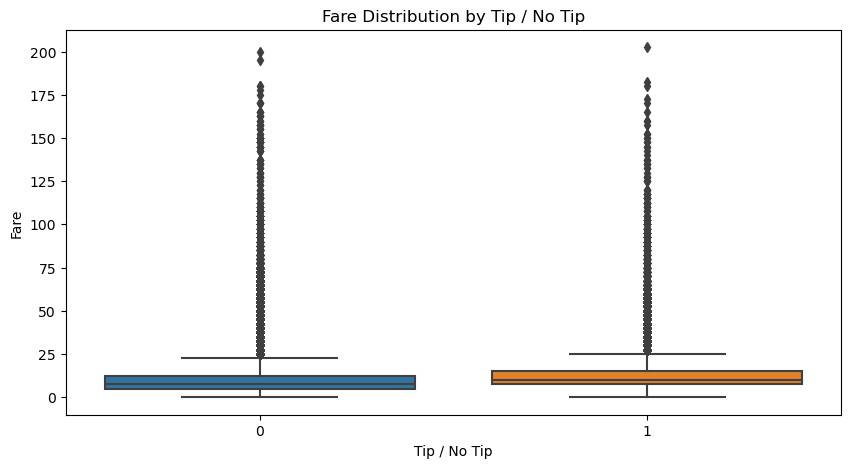

In [28]:
# Boxplot of fare by tipping status
plt.figure(figsize=(10, 5))
sns.boxplot(data=combined_data_pickup, x='tip_binary', y='Fare')
plt.title('Fare Distribution by Tip / No Tip')
plt.xlabel('Tip / No Tip')
plt.ylabel('Fare')
plt.show()

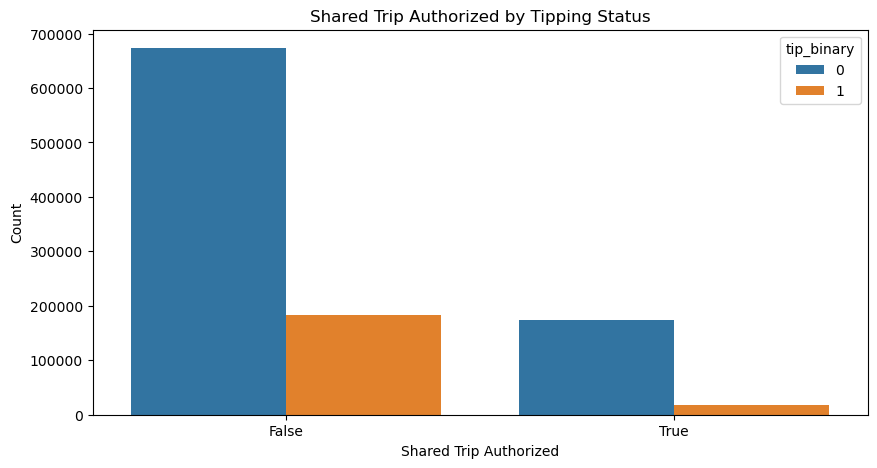

In [29]:
# Bar plot of shared trip authorized by Tip / No Tip
plt.figure(figsize=(10, 5))
sns.countplot(data=combined_data_pickup, x='Shared Trip Authorized', hue='tip_binary')
plt.title('Shared Trip Authorized by Tipping Status')
plt.xlabel('Shared Trip Authorized')
plt.ylabel('Count')
plt.show()

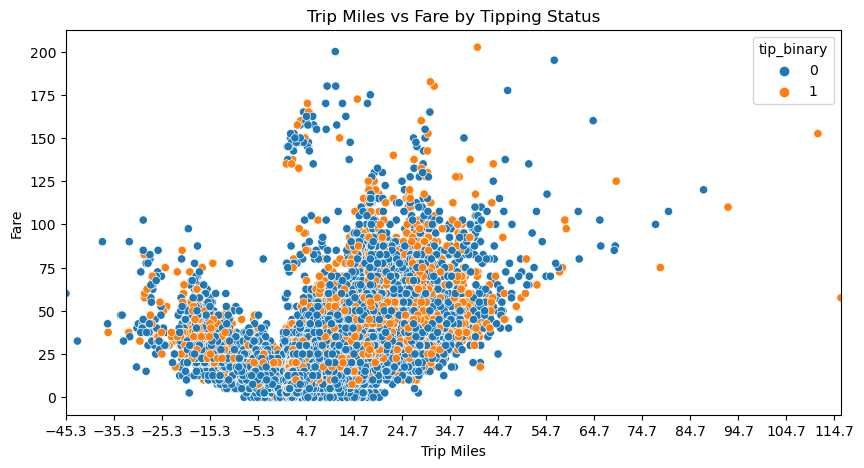

In [30]:
# Scatter plot of trip miles vs fare colored by Tip / No Tip

sampled_data = combined_data_pickup.sample(frac=1, random_state=42)

plt.figure(figsize=(10, 5))
sns.scatterplot(data=sampled_data, x='Trip Miles', y='Fare', hue='tip_binary')
plt.title('Trip Miles vs Fare by Tipping Status')
plt.xlabel('Trip Miles')
plt.ylabel('Fare')

# Set x range and interval
min_trip_miles = combined_data_pickup['Trip Miles'].min()
max_trip_miles = combined_data_pickup['Trip Miles'].max()
plt.xlim(min_trip_miles, max_trip_miles)
plt.xticks(ticks=np.arange(min_trip_miles, max_trip_miles, step=10))

plt.show()